In [1]:
import os, sys, json
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PALETTE = sns.color_palette('pastel')

In [58]:
data_path = '../data/'
train_file = os.path.join(data_path, 'train.json')
preproc_file = os.path.join(data_path, 'preproc_data.json')
preproc_val_file = os.path.join(data_path, 'preproc_val.json')
preproc_train_file = os.path.join(data_path, 'preproc_train.json')
preproc_deduplicated_train_file = os.path.join(data_path, 'preproc_deduplicated_train.json')

In [4]:
with open(train_file) as rf:
    data = json.load(rf)
data = data[:-1]

In [5]:
len(data)

25632

In [53]:
def box_to_rect(box):
    x_box = [w[0] for w in box]
    y_box = [w[1] for w in box]
    x1, x2 = max(0, min(x_box)), max(x_box)
    y1, y2 = max(0, min(y_box)), max(y_box)
    return x1, y1, x2, y2

In [54]:
def show_sample(idx):
    fig = plt.figure(figsize=(14,10))
    sample = data[idx]
    fname = os.path.join(data_path, sample['file'])
    nums = sample['nums']
    boxes = [e['box'] for e in nums]
    print(f'File: {fname}')
    print(f'Bboxes count: {len(nums)}')
    print(f'Bboxes: {boxes}')
    print(f'Numbers: {[e["text"] for e in nums]}')
    img = cv2.imread(fname)
    for box in boxes:
        x1, y1, x2, y2 = box_to_rect(box)
        img = cv2.rectangle(img, (x1, y1), (x2, y2), np.array(PALETTE[0]) * 255, 2)
        cv2.drawContours(img, np.array(box)[None,...], 0, np.array(PALETTE[1]) * 255, 2)
    plt.imshow(img[...,::-1])

File: ../data/train/24156.jpg
Bboxes count: 1
Bboxes: [[[53, 444], [63, 475], [145, 494], [141, 464]]]
Numbers: ['O870KH197']


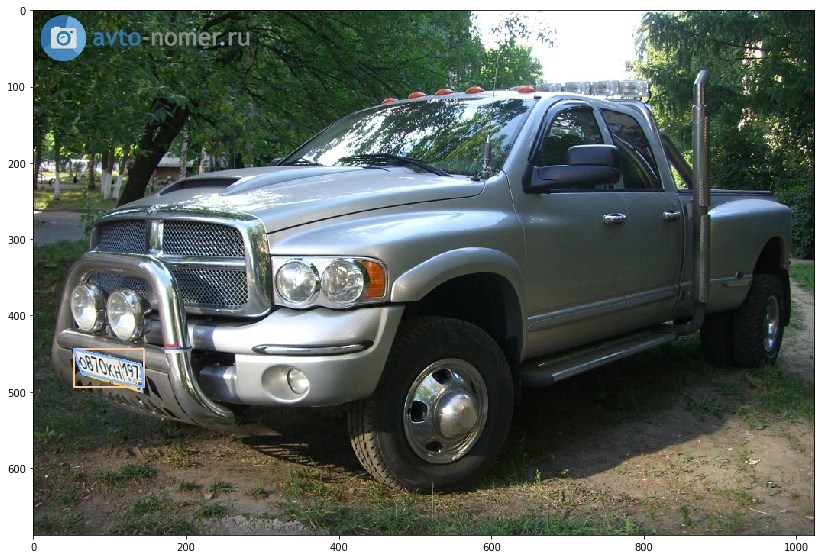

In [17]:
idx = np.random.randint(len(data))
show_sample(idx)

Данные не идеально чистые:
- есть изображения, на которых отмечены не все номера (даже если их отлично видно)
- есть ошибки в подписях

In [18]:
rows = []

for entry in tqdm(data):
    fname = entry['file']
    for num in entry['nums']:
        text = num['text']
        bbox = num['box']
        (lux, luy), (rux, ruy), (rdx, rdy), (ldx, ldy) = bbox
        rows.append({
            'file': fname,
            'text': text,
            'cnt': len(entry['nums']),
            'lux': lux,
            'luy': luy,
            'rux': rux,
            'ruy': ruy,
            'rdx': rdx,
            'rdy': rdy,
            'ldx': ldx,
            'ldy': ldy
        })

100%|██████████| 25632/25632 [00:00<00:00, 274363.91it/s]


In [19]:
df = pd.DataFrame.from_records(rows)

In [20]:
df.isnull().any()

cnt     False
file    False
ldx     False
ldy     False
lux     False
luy     False
rdx     False
rdy     False
rux     False
ruy     False
text    False
dtype: bool

In [21]:
df.drop_duplicates('file').cnt.value_counts()

1    24559
2      984
3       79
4        9
5        1
Name: cnt, dtype: int64

In [22]:
df[df.cnt == 5]

cnt             file  ldx  ldy  lux  luy   rdx  rdy   rux  ruy  \
17806    5  train/17051.jpg  354  171  354  157   409  172   407  155   
17807    5  train/17051.jpg  527  198  529  183   588  201   589  183   
17808    5  train/17051.jpg  723  213  723  197   790  216   789  200   
17809    5  train/17051.jpg  954  243  956  221  1029  245  1030  221   
17810    5  train/17051.jpg  219  824  205  775   397  866   382  812   

            text  
17806   K272BX78  
17807   A006OO78  
17808  E001ET178  
17809  A003TO178  
17810   T301MM78

File: ../data/train/17051.jpg
Bboxes count: 5
Bboxes: [[[354, 157], [407, 155], [409, 172], [354, 171]], [[529, 183], [589, 183], [588, 201], [527, 198]], [[723, 197], [789, 200], [790, 216], [723, 213]], [[956, 221], [1030, 221], [1029, 245], [954, 243]], [[205, 775], [382, 812], [397, 866], [219, 824]]]
Numbers: ['K272BX78', 'A006OO78', 'E001ET178', 'A003TO178', 'T301MM78']


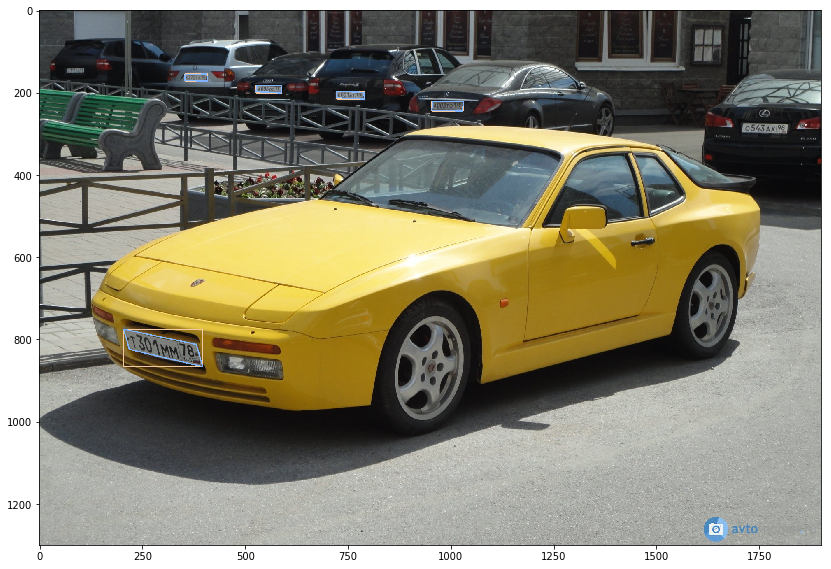

In [23]:
show_sample(17051)

In [24]:
df.describe()

cnt           ldx           ldy           lux           luy  \
count  26805.000000  26805.000000  26805.000000  26805.000000  26805.000000   
mean       1.095878    463.426301    556.688640    460.800634    514.241522   
std        0.338628    348.480572    274.977271    346.870860    262.916891   
min        1.000000      0.000000     15.000000     -1.000000      0.000000   
25%        1.000000    212.000000    308.000000    211.000000    279.000000   
50%        1.000000    354.000000    547.000000    352.000000    504.000000   
75%        1.000000    630.000000    746.000000    626.000000    693.000000   
max        5.000000   3267.000000   2187.000000   3279.000000   2000.000000   

                rdx           rdy           rux           ruy  
count  26805.000000  26805.000000  26805.000000  26805.000000  
mean     650.566835    557.540459    647.001380    514.406976  
std      386.129401    275.798142    386.094134    263.923462  
min        0.000000     15.000000      1.000000      0.000000  
25%      356.000000    309.000000    352.000000    278.000000  
50%      551.000000    549.000000    549.000000    506.000000  
75%      863.000000    749.000000    859.000000    696.000000  
max     3800.000000   2064.000000   3811.000000   1902.000000

In [25]:
df[df.lux < 0]

cnt             file  ldx  ldy  lux  luy  rdx  rdy  rux  ruy      text
12344    1  train/11803.bmp    0  354   -1  309  232  353  229  302  B026AT35

File: ../data/train/11803.bmp
Bboxes count: 1
Bboxes: [[[-1, 309], [229, 302], [232, 353], [0, 354]]]
Numbers: ['B026AT35']


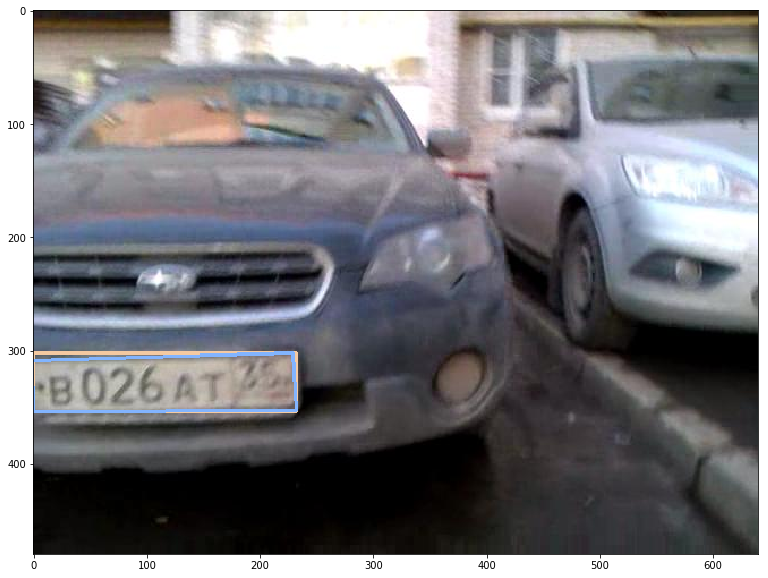

In [26]:
show_sample(11803)

In [27]:
df[df.ldy < df.luy].head()

cnt           file  ldx  ldy  lux  luy  rdx  rdy  rux  ruy       text
104    1   train/96.jpg  969  822  568  833  973  906  572  923  B268EM152
117    1  train/109.bmp  335  209  213  219  333  253  205  254   T865PC35
384    1  train/357.jpg  638  941  477  954  642  979  479  992   E813OX32
426    1  train/399.jpg  978  826  778  856  983  873  779  908   X600EA60
812    1  train/774.jpg  903  574  776  576  903  603  776  607   M222PP39

File: ../data/train/96.jpg
Bboxes count: 1
Bboxes: [[[568, 833], [572, 923], [973, 906], [969, 822]]]
Numbers: ['B268EM152']


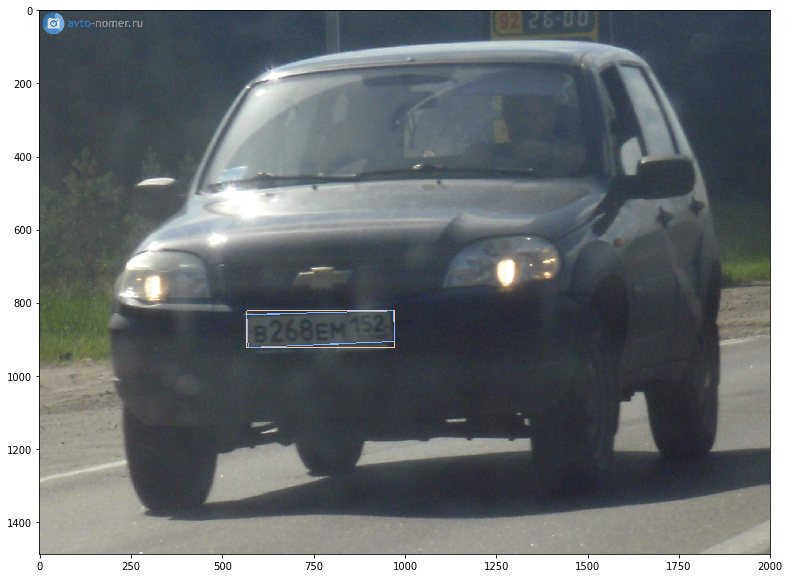

In [28]:
show_sample(96)

### Символы в номерах

In [30]:
df.text.str.len().value_counts()

8    20971
9     5834
Name: text, dtype: int64

In [31]:
chars = set()
for text in df.text:
    chars.update(text)

In [32]:
from string import digits, ascii_uppercase

In [33]:
good_chars = chars & (set(digits) | set(ascii_uppercase))

In [34]:
bad_chars = chars - good_chars

In [35]:
df['has_bad_chars'] = df.text.apply(lambda txt: len(set(txt) & bad_chars) > 0)

In [36]:
df.has_bad_chars.mean()

0.05614624137287819

In [37]:
df[df.has_bad_chars].head()

cnt          file   ldx   ldy   lux  luy   rdx  rdy   rux  ruy       text  \
19    1  train/18.bmp   152   270   150  252   250  264   248  248   В105ЕY35   
30    1  train/29.jpg   580   691   581  631   884  684   878  622  С333ХС199   
45    1  train/44.jpg  1656  1054  1666  985  1851  958  1861  894  А866КY154   
64    1  train/60.jpg   329   540   337  509   443  560   449  524   К819ЕМ75   
75    1  train/70.jpg   309   502   310  464   466  511   469  474   o717pp98   

    has_bad_chars  
19           True  
30           True  
45           True  
64           True  
75           True

In [38]:
print(''.join(bad_chars))

xкаАтmoеХyуУосkpмtвКОВНСРЕхМaрcТeh


In [39]:
'В105ЕY35' == 'B105EY35'

False

In [40]:
ru_up_chars = 'АВЕКМНОРСТУХ'
ru_en_map = 'ABEKMHOPCTYX'
ru_en_translator = str.maketrans(ru_up_chars, ru_en_map)

def fix_text(text):
    text = text.upper()
    return text.translate(ru_en_translator)

In [41]:
fix_text('В105ЕY35') == 'B105EY35'

True

In [42]:
df['fixed_text'] = df.text.apply(fix_text)

In [43]:
new_chars = set()
for fixed_text in df.fixed_text:
    new_chars.update(fixed_text)

In [44]:
''.join(sorted(new_chars))

'0123456789ABCEHKMOPTXY'

### Повторяющиеся номера

In [45]:
df.fixed_text.value_counts().head()

A184XE38     45
O048CA38     19
Y612EY35     10
H020HH102    10
M613BO12     10
Name: fixed_text, dtype: int64

In [46]:
len(df.fixed_text.unique()) / len(df)

0.8843872411863458

In [47]:
df[df.text == 'A184XE38'].head()

cnt            file  ldx  ldy  lux  luy   rdx  rdy   rux  ruy      text  \
492     1   train/464.bmp  178  458  179  430   330  450   328  424  A184XE38   
972     1   train/929.bmp  309  854  312  800   597  865   594  808  A184XE38   
2907    1  train/2773.bmp  921  959  919  862  1445  969  1446  870  A184XE38   
3477    1  train/3315.bmp  924  953  936  868  1436  964  1442  872  A184XE38   
3514    2  train/3349.bmp  313  852  312  799   593  865   593  810  A184XE38   

      has_bad_chars fixed_text  
492           False   A184XE38  
972           False   A184XE38  
2907          False   A184XE38  
3477          False   A184XE38  
3514          False   A184XE38

File: ../data/train/464.bmp
Bboxes count: 1
Bboxes: [[[179, 430], [328, 424], [330, 450], [178, 458]]]
Numbers: ['A184XE38']


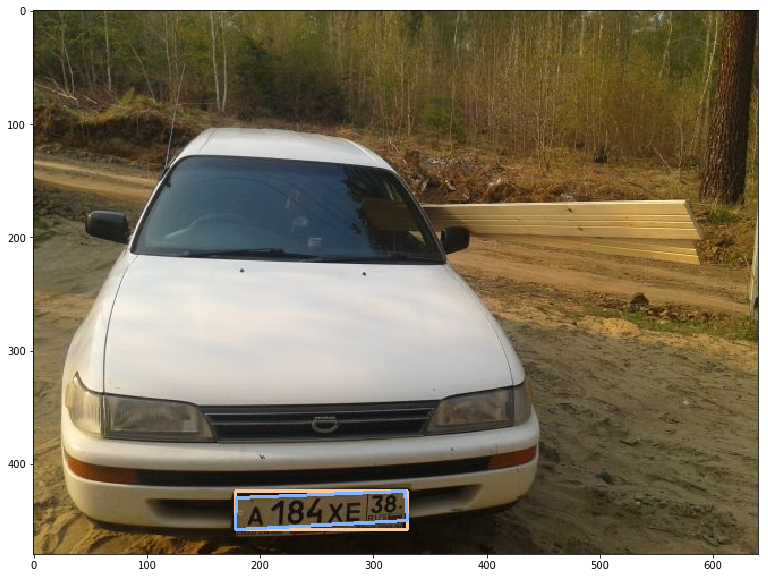

In [48]:
show_sample(464)

File: ../data/train/929.bmp
Bboxes count: 1
Bboxes: [[[312, 800], [594, 808], [597, 865], [309, 854]]]
Numbers: ['A184XE38']


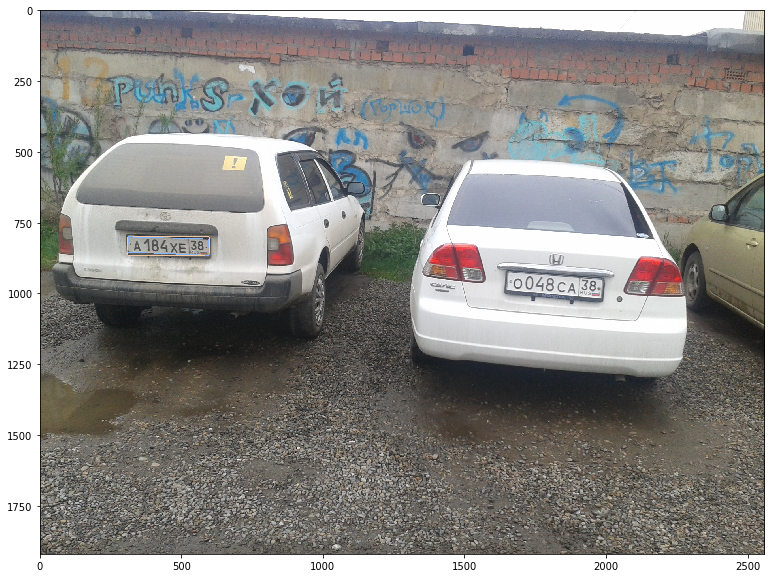

In [49]:
show_sample(929)

### Data preprocessing

In [129]:
def sort_by_min_x(boxes, coords, texts):
    combined = zip(boxes, coords, texts)
    # Сортируем по минимальной x-координате (для удобства валидации)
    boxes, coords, texts = zip(*sorted(combined, key=lambda x: x[0][0]))
    return boxes, coords, texts

In [130]:
preprocessed_data = []
for sample in tqdm(data):
    fname = sample['file']
    nums = sample['nums']
    coords = [num['box'] for num in nums]
    texts = [fix_text(num['text']) for num in nums]    
    boxes = [box_to_rect(box) for box in coords]
    boxes, coords, texts = sort_by_min_x(boxes, coords, texts)
    
    img = cv2.imread(os.path.join(data_path, fname))
    h, w, _ = img.shape
    
    new_sample = {
        'file': fname,
        'boxes': boxes,
        'coords': coords,
        'height': h,
        'width': w,
        'texts': texts
    }
    preprocessed_data.append(new_sample)

100%|██████████| 25632/25632 [18:45<00:00, 22.78it/s]


In [131]:
preprocessed_data[0]

{'file': 'train/0.jpg',
 'boxes': ((180, 889, 598, 1056),),
 'coords': ([[180, 889], [596, 951], [598, 1056], [185, 983]],),
 'height': 1396,
 'width': 1733,
 'texts': ('B060BB125',)}

In [132]:
with open(preproc_file, 'w') as f:
     json.dump(preprocessed_data, f)

### Train/val split
отберём на валидацию часть номеров, которые встречаются в выборке единожды

In [133]:
unique_nums = df.fixed_text.drop_duplicates(keep=False).values
len(unique_nums)

21339

In [134]:
VAL_SIZE = 1000
np.random.seed(777)
val_nums = np.random.choice(unique_nums, size=VAL_SIZE, replace=False)
len(val_nums)

1000

In [135]:
val_files = set(df[df.fixed_text.isin(val_nums)].file)
len(val_files)

1000

In [136]:
deduplicated_train_files = set(df[~df.file.isin(val_files)].drop_duplicates('fixed_text').file)
len(deduplicated_train_files)

21800

In [137]:
preproc_val = []
preproc_train = []
preproc_deduplicated_train = []

for sample in preprocessed_data:
    fname = sample['file']
    if fname in val_files:
        preproc_val.append(sample)
        continue
    if fname in deduplicated_train_files:
        preproc_deduplicated_train.append(sample)
    preproc_train.append(sample)

In [138]:
len(preproc_val), len(preproc_train), len(preproc_deduplicated_train)

(1000, 24632, 21800)

In [139]:
with open(preproc_val_file, 'w') as f:
     json.dump(preproc_val, f)

In [140]:
with open(preproc_train_file, 'w') as f:
     json.dump(preproc_train, f)

In [141]:
with open(preproc_deduplicated_train_file, 'w') as f:
     json.dump(preproc_deduplicated_train, f)